In [63]:
#Cargar las librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

#Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer

In [7]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [5]:
#Realiza lectura de los datos
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Se realiza una descripcion de los datos
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


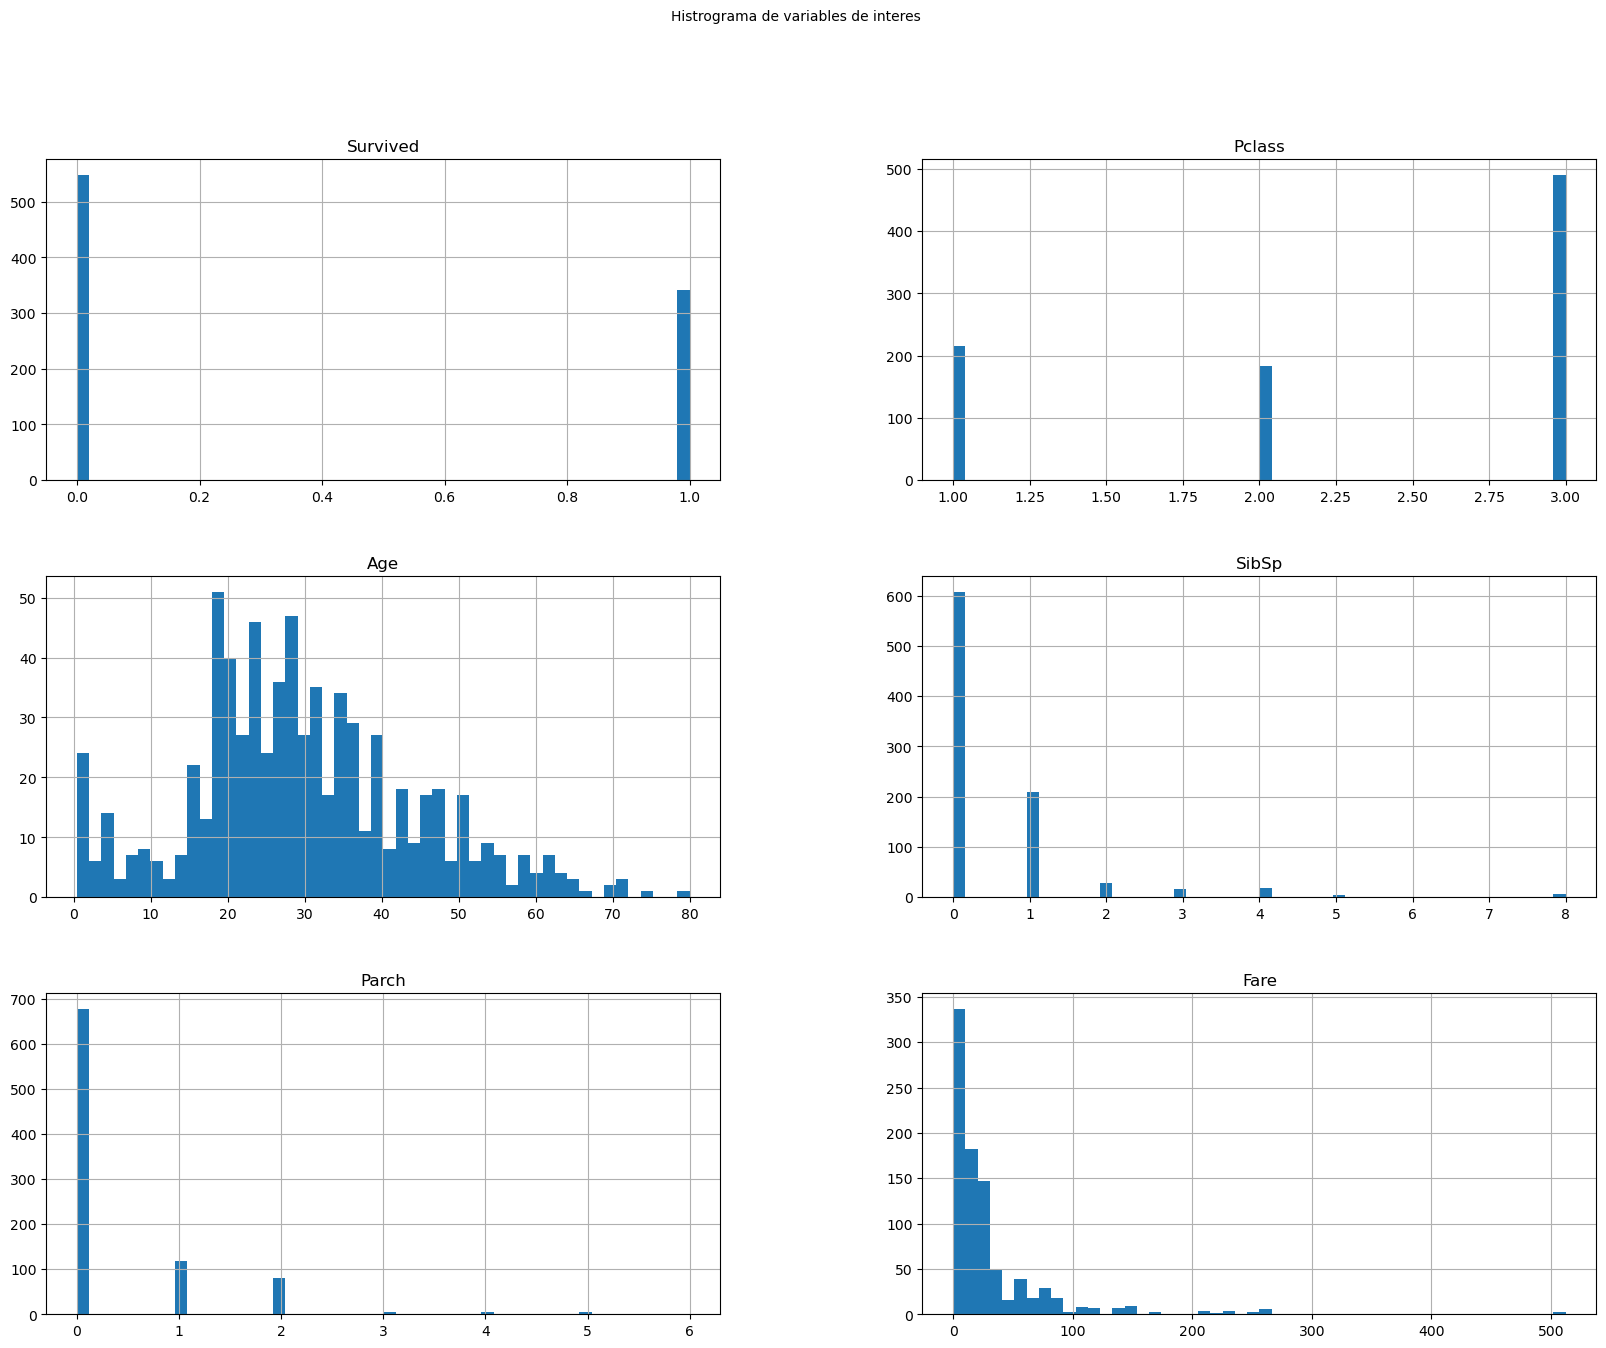

In [31]:
#Histrogramas
data[['Survived','Pclass','Age','SibSp','Parch','Fare']].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histrograma de variables de interes', fontsize=10)
plt.show()

In [ ]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [33]:
#Comprueba si existen registros duplicados
duplicado = data.duplicated().sum()
print(f"La cantidad de datos duplicados es: {duplicado}")

La cantidad de datos duplicados es: 0


In [35]:
#Identifica la cantidad de valores nulos
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

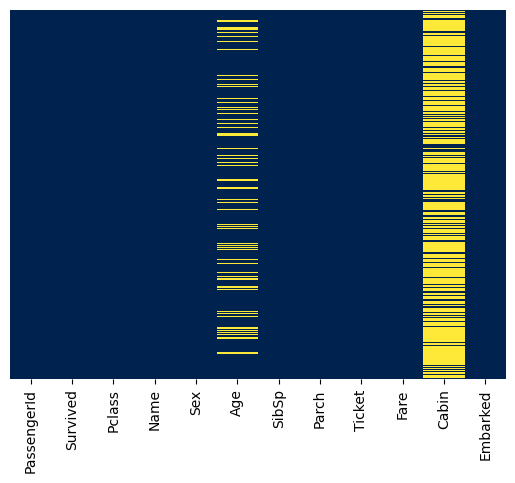

In [53]:
#Mapa de calor valores nulos
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [81]:
# Codificar variables categóricas
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [91]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [85]:
#Imputar valores faltantes en 'Age' con el promedio
data['Age'].fillna(data['Age'].mean(), inplace=True)

C:\Users\jefri\AppData\Local\Temp\ipykernel_8792\565668881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [117]:
#Se elimina las columnas irrelevantes
data = data.drop(columns=['Cabin','Name', 'Ticket', 'PassengerId'], axis=1)

In [ ]:
#Se verifica los los resultados obtenidos luego de tratar los datos

In [119]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [121]:
data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

<Axes: >

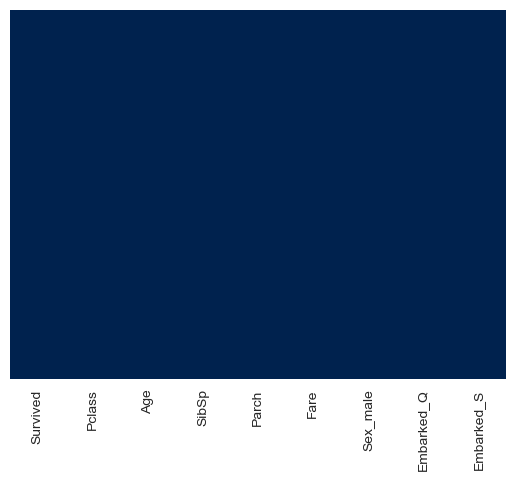

In [123]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [ ]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

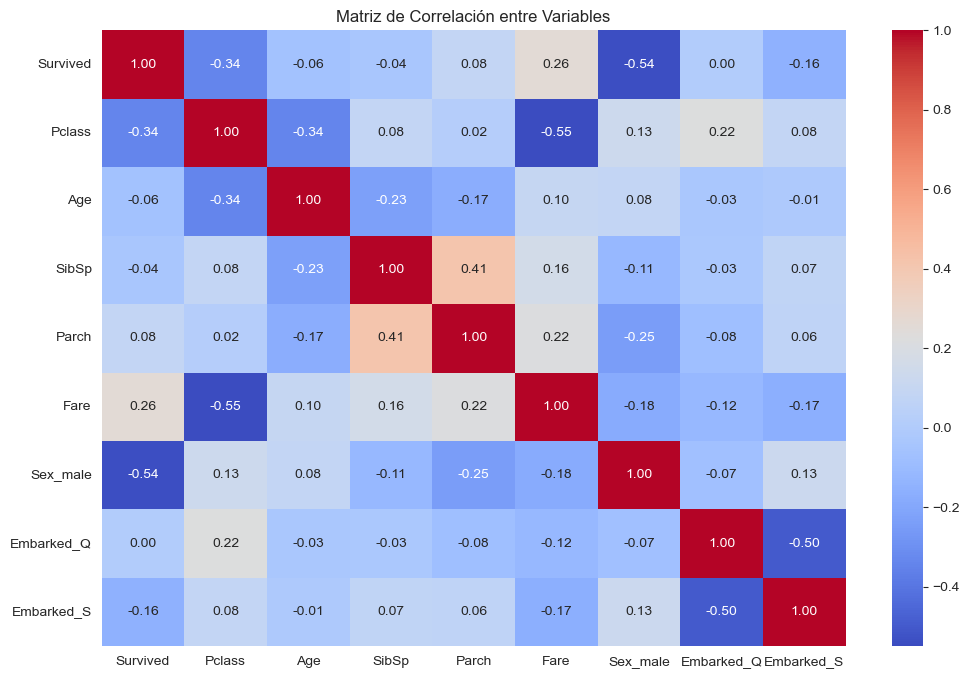

In [127]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

In [129]:
# Correlación de las características con la variable objetivo 'Survived'
corr_with_target = corr_matrix["Survived"].sort_values(ascending=False)
corr_with_target

Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.155660
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64

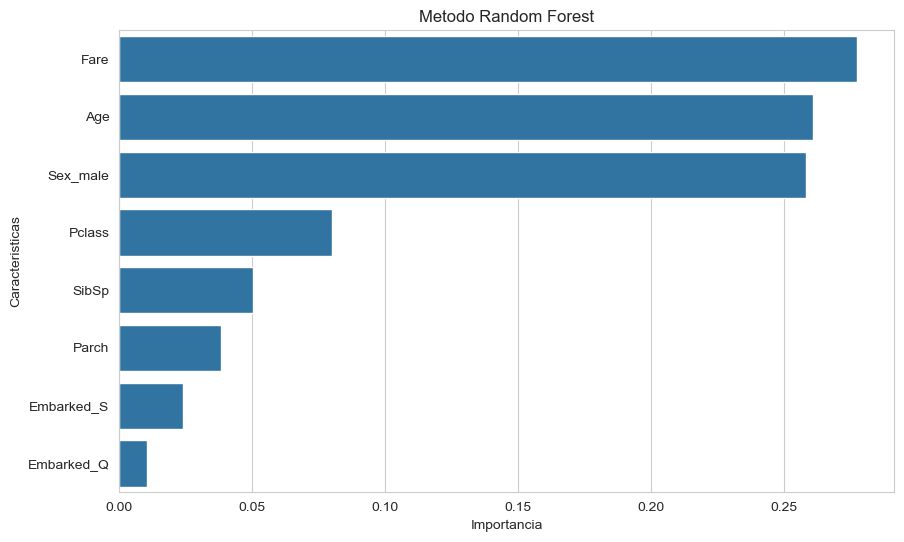

In [131]:
#Metodo Random Forest
#Se crean variables para separar las variables excepto 'condition' en x y cargar la variable objetivo en y.
x = data.drop('Survived', axis=1)
y = data['Survived']

#Se crea el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

#Se obtiene la importancia de las variables
importancia = model.feature_importances_

#Se crea un data frame para poder visualizar
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance':importancia})

#Se ordena las variables por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#Se visualiza mediante un diagrama de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Metodo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

In [ ]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [133]:
#Este codigo crea una división en un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state= 42)

In [137]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 8), (223, 8), (668,), (223,))

In [ ]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [141]:
#Entrenando el modelo de regresion logistica
model_reg_log = LogisticRegression(solver = "liblinear")
model_reg_log.fit (x_train, y_train)

#Se crea el modelo de prediccion
prediccion = model_reg_log.predict(x_test)

In [ ]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [143]:
#Calcula la precicion del modelo de regresion logistica
precision = accuracy_score (y_test, prediccion)
print("La presicion del modelo es:", precision)

La presicion del modelo es: 0.7802690582959642


In [165]:
#Informe de clasificacion
reporte = classification_report(y_test, prediccion)
print(reporte)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       137
           1       0.73      0.67      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [ ]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

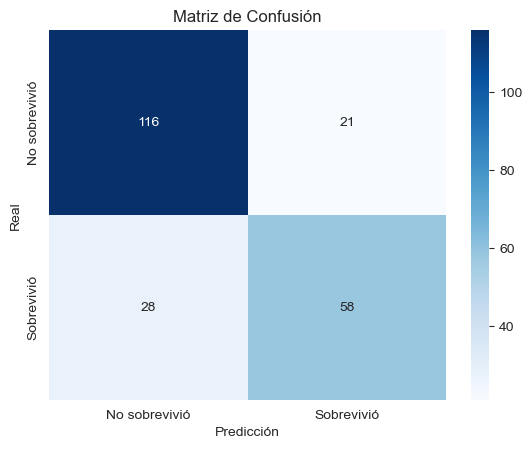

In [161]:
matriz=confusion_matrix(y_test,prediccion)
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No sobrevivió', 'Sobrevivió'],
            yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

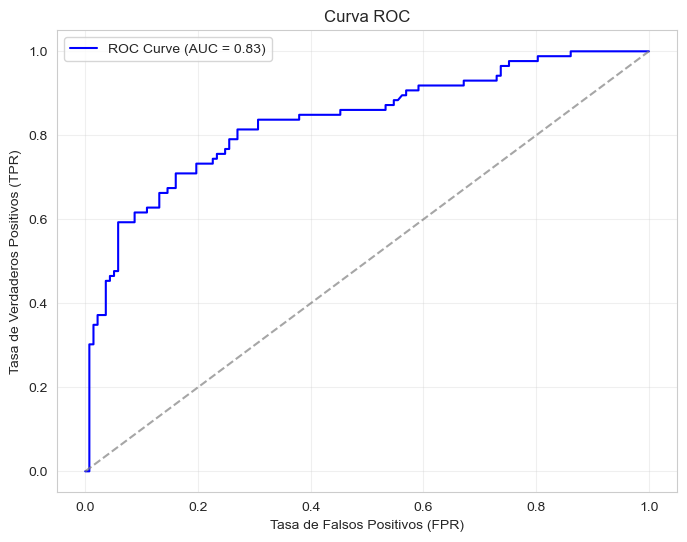

In [167]:
y_pred_prob = model_reg_log.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()